# Univariate and bivariate optimization
**ECON2125/6012 Lecture 2**
Fedor Iskhakov

## Announcements & Reminders

- **Tutorials start tomorrow (Aug 4)**
- Register for tutorials on [Wattle](https://wattlecourses.anu.edu.au/course/view.php?id=41102) if you have not done so already
- Office hours of the tutors are updated:
  - **Wending Liu**
    - Email: Wending.Liu@anu.edu.au
    - Room: Room 2084, Copland Bld (24) (_updated!_)
    - Office hours: **Friday 1pm-3pm**
  - **Chien Yeh**
    - Email: Chien.Yeh@anu.edu.au
    - Room: Room 2106, Copland Bld (24)
    - Office hours: **Monday 2pm-4pm**
- Reminder on how to ask questions: 
  1. Administrative: RSE admin
  2. Content/understanding: tutors
  3. Other: to Fedor

## Plan for this lecture

1. Motivation (math vs. computing)
2. Univariate optimization
3. Working with bivariate functions
4. Bivariate optimization

**Supplementary reading:**
- Simon & Blume: part 1 (revision) 
- Sundaram: sections 1.1, 1.4, chapter 2, chapter 4
## Computing

The _classic_ way we do mathematics is pencil and paper

> In 1944, Hans Bethe solved following problem _by hand_:\
> Will detonating an atom bomb ignite the atmosphere and
> thereby destroy life on earth?\
> [source](https://inis.iaea.org/search/search.aspx?orig_q=RN:25070731)

These days we rarely calculate with actual numbers

Almost all calculations are done on computers

```{admonition} Example: numerical integration
:class: tip

$$
\frac{1}{\sqrt{2\pi}} 
\int_{-2}^2 
\exp\left\{ - \frac{x^2}{2} \right\} dx
$$
```

In [1]:
from scipy.stats import norm
from scipy.integrate import quad
phi = norm()
value, error = quad(phi.pdf, -2, 2)
print('Integral value =',value)

Integral value = 0.9544997361036417


```{admonition} Example: Numerical optimization
:class: tip

$$
f(x) = - \exp
\left\{-\frac{(x - 5.0)^4}{1.5} \right\}
\rightarrow \min
$$
```

In [2]:
from scipy.optimize import fminbound
import numpy as np
f = lambda x: -np.exp(-(x - 5.0)**4 / 1.5)
res = fminbound(f, -10, 10)  # find approx solution
print('Minimum value is attained approximately at', res)

Minimum value is attained approximately at 4.999941901210501


```{admonition} Example: Visualization
:class: tip

What does this function look like?

$$
f(x, y) = \frac{\cos(x^2 + y^2)}{1 + x^2 + y^2}
$$
```

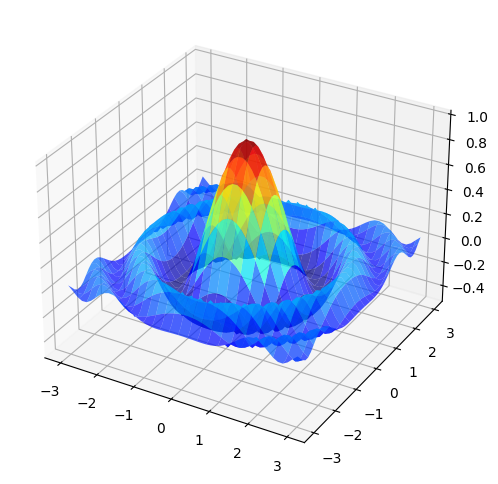

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib import cm
f = lambda x, y: np.cos(x**2 + y**2) / (1 + x**2 + y**2)
xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

```{admonition} Example: Symbolic calculations 
:class: tip

Differentiate $f(x) = (1 + 2x)^5$.\
Forgotten how?  No problems, just ask a computer for _symbolic_ derivative
```

In [4]:
import sympy as sp
x = sp.Symbol('x')
fx = (1 + 2 * x)**5
print("Derivative of",fx,"is",fx.diff(x))

Derivative of (2*x + 1)**5 is 10*(2*x + 1)**4


So if computers can do our maths for us, why learn maths?

The difficulty is
- giving them the right inputs and instructions 
- interpreting what comes out

The skills we need are 
- Understanding of fundamental concepts
- Sound deductive reasoning

**These are the focus of the course**

### Computer Code in the Lectures

While computation is not a formal part of the course\
there will be little bits of code in the lectures to illustrate the kinds of things we can do.

- All the code will be written in the Python programming language
- It is not assessable

You might find value in actually running the code shown in lectures\
If you want to do so please refer to **linked GitHub repository** in [optim.iskh.me](https://optim.iskh.me)

## Univariate Optimization

Let $f \colon [a, b] \to \mathbb{R}$ be a differentiable (smooth) function

- $[a, b]$ is all $x$ with $a \leq x \leq b$
- $\mathbb{R}$ is "all numbers"
- $f$ takes $x \in [a, b]$ and returns number $f(x)$ 
- derivative $f'(x)$ exists for all $x$ with $a < x < b$

```{admonition} Definition
:class: caution

A  point $x^* \in [a, b]$ is called a 
- ***maximizer*** of $f$ on $[a, b]$ if $f(x^*) \geq f(x)$ for all $x \in [a,b]$
- ***minimizer*** of $f$ on $[a, b]$ if $f(x^*) \leq f(x)$ for all $x \in [a,b]$
```

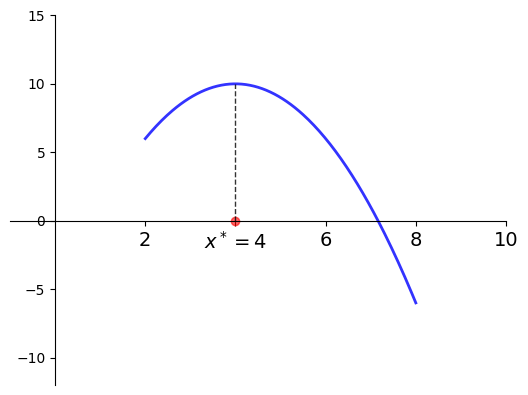

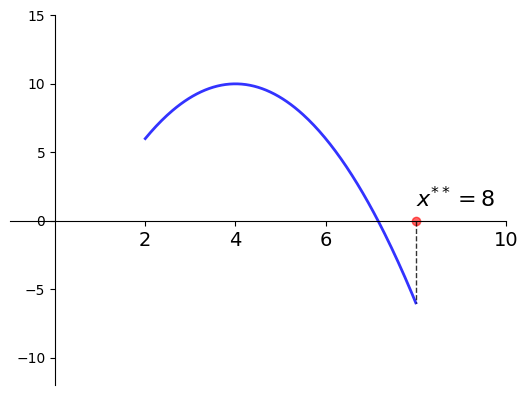

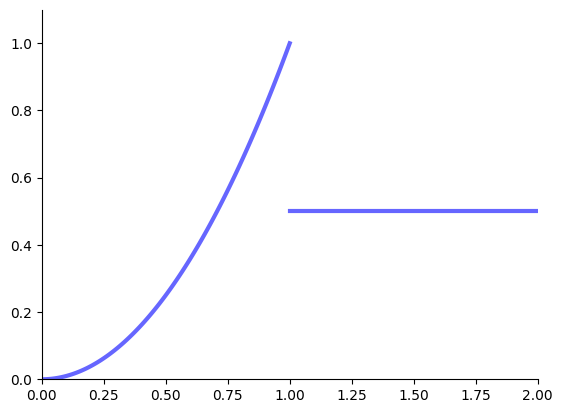

In [5]:
from myst_nb import glue
import matplotlib.pyplot as plt
import numpy as np

def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()
    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')
    return fig, ax

xmin, xmax = 2, 8
xgrid = np.linspace(xmin, xmax, 200)
f = lambda x: -(x - 4)**2 + 10

xstar = 4.0
fig, ax = subplots()
ax.plot([xstar], [0],  'ro', alpha=0.6)
ax.set_ylim(-12, 15)
ax.set_xlim(-1, 10)
ax.set_xticks([2, xstar, 6, 8, 10])
ax.set_xticklabels([2, r'$x^*=4$', 6, 8, 10], fontsize=14)
ax.plot(xgrid, f(xgrid), 'b-', lw=2, alpha=0.8, label=r'$f(x) = -(x-4)^2+10$')
ax.plot((xstar, xstar), (0, f(xstar)), 'k--', lw=1, alpha=0.8)
#ax.legend(frameon=False, loc='upper right', fontsize=16)
glue("fig_maximizer", fig, display=False)

xstar = xmax
fig, ax = subplots()
ax.plot([xstar], [0],  'ro', alpha=0.6)
ax.text(xstar, 1, r'$x^{**}=8$', fontsize=16)
ax.set_ylim(-12, 15)
ax.set_xlim(-1, 10)
ax.set_xticks([2, 4, 6, 10])
ax.set_xticklabels([2, 4, 6, 10], fontsize=14)
ax.plot(xgrid, f(xgrid), 'b-', lw=2, alpha=0.8, label=r'$f(x) = -(x-4)^2+10$')
ax.plot((xstar, xstar), (0, f(xstar)), 'k--', lw=1, alpha=0.8)
#ax.legend(frameon=False, loc='upper right', fontsize=16)
glue("fig_minimizer", fig, display=False)

xmin, xmax = 0, 1
xgrid1 = np.linspace(xmin, xmax, 100)
xgrid2 = np.linspace(xmax, 2, 10)

fig, ax = subplots()
ax.set_ylim(0, 1.1)
ax.set_xlim(-0.0, 2)
func_string = r'$f(x) = x^2$ if $x < 1$ else $f(x) = 0.5$'
ax.plot(xgrid1, xgrid1**2, 'b-', lw=3, alpha=0.6, label=func_string)
ax.plot(xgrid2, 0 * xgrid2 + 0.5, 'b-', lw=3, alpha=0.6)
#ax.legend(frameon=False, loc='lower right', fontsize=16)
glue("fig_none", fig, display=False)

````{admonition} Example
:class: tip

Let
- $f(x) = -(x-4)^2 + 10$ 
- $a = 2$ and $b=8$

Then 
- $x^* = 4$ is a maximizer of $f$ on $[2, 8]$
- $x^{**} = 8$ is a minimizer of $f$ on $[2, 8]$

```{glue:figure} fig_maximizer
:width: 80%
:align: center

Maximizer on $[a, b] = [2, 8]$ is $x^* = 4$
```

```{glue:figure} fig_minimizer
:width: 80%
:align: center

Minimizer on $[a, b] = [2, 8]$ is $x^{**} = 8$
```
````

The set of maximizers/minimizers can be 

- empty
- a singleton (contains one element)
- infinite (contains infinitely many elements)

```{admonition} Example: infinite maximizers
:class: tip

$f \colon [0, 1] \to \mathbb{R}$ defined by $f(x) =1$\
has infinitely many maximizers and minimizers on $[0, 1]$
```

````{admonition} Example: no maximizers
:class: tip

The following function has no maximizers on $[0, 2]$

$$
f(x) = 
\begin{cases}
x^2 &  \text{ if } x < 1
\\
1/2 &  \text{ otherwise}
\end{cases}
$$

```{glue:figure} fig_none
:width: 80%
:align: center

No maximizer on $[0, 2]$
```
````

```{admonition} Definition
:class: caution

Point  $x$ is called ***interior*** to $[a, b]$ if $a < x < b$ 
```

The set of all interior points is written $(a, b)$

We refer to $x^* \in [a, b]$ as
- ***interior maximizer*** if both a maximizer and interior 
- ***interior minimizer*** if both a minimizer and interior 

## Finding optima

```{admonition} Definition
:class: caution

A ***stationary point*** of $f$ on $[a, b]$ is an interior point $x$ with $f'(x) = 0$
```

```{figure} _static/plots/stationary.png
:width: 80%
:align: center

Both $x^*$ and $x^{**}$ are stationary
```

```{admonition} Fact
:class: important

If $f$ is differentiable and $x^*$ is either an interior minimizer
or an interior maximizer of $f$ on $[a, b]$, then $x^*$ is stationary
```

Sketch of proof, for maximizers: 

$$
f'(x^*) = \, \lim_{h \to 0} \, \frac{f(x^* + h) - f(x^*)}{h}
\qquad \text{(by def.)}
$$ 

$$
\Rightarrow f(x^* + h) \approx f(x^*) + f'(x^*) h 
\qquad \text{for small } h 
$$

If $f'(x^*) \ne 0$ then exists small $h$ such that $f(x^* + h) > f(x^*)$

Hence interior maximizers must be stationary --- otherwise we can do better


$\Rightarrow$ any interior maximizer stationary\
$\Rightarrow$ set of interior maximizers $\subset$ set of stationary points\
$\Rightarrow$ maximizers $\subset$ stationary points $\cup \{a\} \cup \{b\}$

Usage:
1. Locate stationary points 
2. Evaluate $y = f(x)$ for each stationary $x$ and for $a$, $b$
3. Pick point giving largest $y$ value

Minimization: same idea

```{admonition} Example
:class: tip

Let's solve

$$ 
\max_{-2 \leq x \leq 5} f(x) 
\quad \text{where} \quad
f(x) = x^3 - 6x^2 + 4x + 8
$$

Steps
- Differentiate to get $f'(x) = 3x^2 - 12x + 4$
- Solve $3x^2 - 12x + 4 = 0$ to get stationary $x$
- Discard any stationary points outside $[-2, 5]$
- Eval $f$ at remaining points plus end points $-2$ and $5$
- Pick point giving largest value
```

In [6]:
from sympy import *
x = Symbol('x')
points = [-2, 5]
f = x**3 - 6*x**2 + 4*x + 8
fp = diff(f, x)
spoints = solve(fp, x)
points.extend(spoints)
v = [f.subs(x, c).evalf() for c in points]
maximizer = points[v.index(max(v))]
print("Maximizer =", str(maximizer),'=',maximizer.evalf())

Maximizer = 2 - 2*sqrt(6)/3 = 0.367006838144548


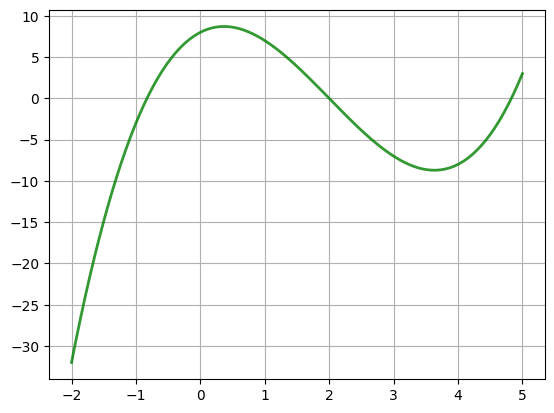

In [7]:
import matplotlib.pyplot as plt
import numpy as np
xgrid = np.linspace(-2, 5, 200)
f = lambda x: x**3 - 6*x**2 + 4*x + 8
fig, ax = plt.subplots()
ax.plot(xgrid, f(xgrid), 'g-', lw=2, alpha=0.8)
ax.grid()

## Shape Conditions and Sufficiency

When is $f'(x^*) = 0$ sufficient for $x^*$ to be a maximizer?

One answer: When $f$ is concave

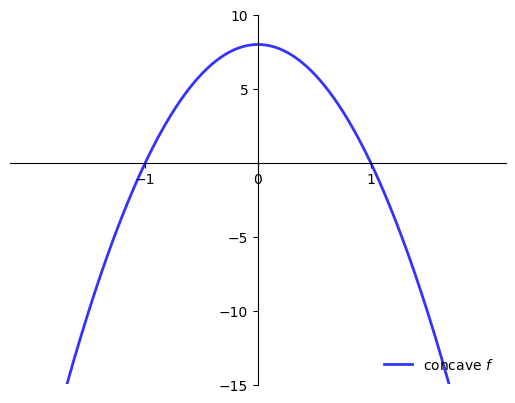

In [8]:
xgrid = np.linspace(-2, 2, 200)
f = lambda x: - 8*x**2 + 8
fig, ax = subplots()
ax.set_ylim(-15, 10)
ax.set_yticks([-15, -10, -5, 5, 10])
ax.set_xticks([-1, 0, 1])
ax.plot(xgrid, f(xgrid), 'b-', lw=2, alpha=0.8, label='concave $f$')
ax.legend(frameon=False, loc='lower right')
plt.show()

(Full definition deferred)

```{admonition} Sufficient conditions for *concavity* in one dimension
:class: important

Let $f \colon [a, b] \to \mathbb{R}$
- If $f''(x) \leq 0$ for all $x \in (a, b)$ then $f$ is concave on $(a, b)$
- If $f''(x) < 0$ for all $x \in (a, b)$ then $f$ is **strictly** concave on $(a, b)$
```

```{admonition} Example
:class: tip

- $f(x) = a + b x$ is concave on $\mathbb{R}$ but not strictly
- $f(x) = \log(x)$ is strictly concave on $(0, \infty)$
```

When is $f'(x^*) = 0$ sufficient for $x^*$ to be a minimizer?

One answer: When $f$ is convex

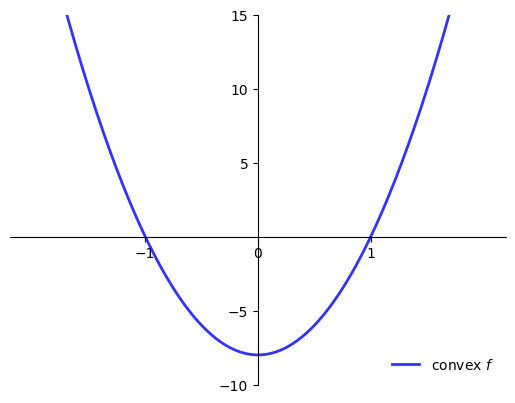

In [9]:
xgrid = np.linspace(-2, 2, 200)
f = lambda x: - 8*x**2 + 8
fig, ax = subplots()
ax.set_ylim(-10, 15)
ax.set_yticks([-10, -5, 5, 10, 15])
ax.set_xticks([-1, 0, 1])
ax.plot(xgrid, -f(xgrid), 'b-', lw=2, alpha=0.8, label='convex $f$')
ax.legend(frameon=False, loc='lower right')
plt.show()

(Full definition deferred)

```{admonition} Sufficient conditions for *convexity* in one dimension
:class: important

Let $f \colon [a, b] \to \mathbb{R}$
- If $f''(x) \geq 0$ for all $x \in (a, b)$ then $f$ is convex on $(a, b)$
- If $f''(x) > 0$ for all $x \in (a, b)$ then $f$ is **strictly**
convex on $(a, b)$
```

```{admonition} Example
:class: tip

- $f(x) = a + b x$ is convex on $\mathbb{R}$ but not strictly
- $f(x) = x^2$ is strictly convex on $\mathbb{R}$
```

### Sufficiency and uniqueness with shape conditions

```{admonition} Fact
:class: important

For maximizers:
- If $f \colon [a,b] \to \mathbb{R}$ is concave and $x^* \in (a, b)$ is
stationary then $x^*$ is a maximizer
- If, in addition, $f$ is strictly concave, then $x^*$ is the
unique maximizer
```

```{admonition} Fact
:class: important

For minimizers:
- If $f \colon [a,b] \to \mathbb{R}$ is convex and $x^* \in (a, b)$ is
stationary then $x^*$ is a minimizer
- If, in addition, $f$ is strictly convex, then $x^*$ is the
unique minimizer
```

```{admonition} Example
:class: tip

A price taking firm faces output price $p > 0$, input price $w >0$

Maximize profits with respect to input $\ell$

$$
\max_{\ell \ge 0} \pi(\ell) = p f(\ell) - w \ell,
$$

where the production technology is given by 

$$
f(\ell) = \ell^{\alpha}, 0 < \alpha < 1.
$$
```

Evidently

$$
\pi'(\ell) = \alpha p \ell^{\alpha - 1} - w,
$$

so unique stationary point is

$$
\ell^* = (\alpha p/w)^{1/(1 - \alpha)}
$$

Moreover, 

$$
\pi''(\ell) = \alpha (\alpha - 1) p \ell^{\alpha - 2} < 0
$$

for all $\ell \ge 0$ so $\ell^*$ is unique maximizer.

1.5774

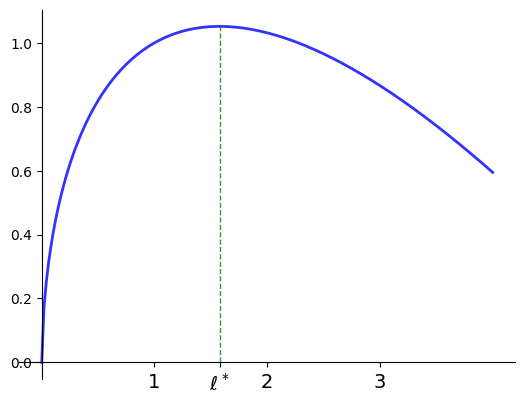

In [10]:
p = 2.0
w = 1.0
alpha = 0.6
xstar = (alpha * p / w)**(1/(1 - alpha))
xgrid = np.linspace(0, 4, 200)
f = lambda x: x**alpha
pi = lambda x: p * f(x) - w * x
fig, ax = subplots()
ax.set_xticks([1,xstar,2,3])
ax.set_xticklabels(['1',r'$\ell^*$','2','3'], fontsize=14)
ax.plot(xgrid, pi(xgrid), 'b-', lw=2, alpha=0.8, label=r'$\pi(\ell) = p\ell^{\alpha} - w\ell$')
ax.plot((xstar, xstar), (0, pi(xstar)), 'g--', lw=1, alpha=0.8)
#ax.legend(frameon=False, loc='upper right', fontsize=16)
glue("fig_price_taker", fig, display=False)
glue("ellstar", round(xstar,4))

```{glue:figure} fig_price_taker
:width: 80%
:align: center

Profit maximization with $p=2$, $w=1$, $\alpha=0.6$, $\ell^*=${glue:}`ellstar` 
```

## Functions of two variables

Let's have a look at some functions of two variables

- How to visualize them
- Slope, contours, etc.

```{admonition} Example: Cobb-Douglas production function
:class: tip

Consider production function 

$$
f(k, \ell) = k^{\alpha} \ell^{\beta}\\
\alpha \ge 0, \, \beta \ge 0, \, \alpha + \beta < 1
$$

Let's graph it in two dimensions.
```

```{figure} _static/plots/prod2d.png
:width: 80%
:align: center

Production function with $\alpha=0.4$, $\beta=0.5$ (a)
```

```{figure} _static/plots/prod2d_1.png
:width: 80%
:align: center

Production function with $\alpha=0.4$, $\beta=0.5$ (b)
```
```{figure} _static/plots/prod2d_2.png
:width: 80%
:align: center

Production function with $\alpha=0.4$, $\beta=0.5$ (c)
```


Like many 3D plots it's hard to get a good understanding

Let's try again with contours plus heat map

```{figure} _static/plots/prodcontour.png
:width: 80%
:align: center

Production function with $\alpha=0.4$, $\beta=0.5$, contours
```

In this context the contour lines are called ***isoquants***

Can you see how $\alpha < \beta$ shows up in the slope of the contours?

We can drop the colours to see the numbers more clearly

```{figure} _static/plots/prodcontour2.png
:width: 80%
:align: center

Production function with $\alpha=0.4$, $\beta=0.5$
```

```{admonition} Example: log-utility
:class: tip

Let $u(x_1,x_2)$ be "utility" gained from $x_1$ units of good 1 and $x_2$ units of good 2

We take 

$$
u(x_1, x_2) = \alpha \log(x_1) + \beta \log(x_2)
$$

where
- $\alpha$ and $\beta$ are parameters
- we assume $\alpha>0, \, \beta > 0$
- The log functions mean "diminishing returns" in each good
```

```{figure} _static/plots/log_util.png
:width: 80%
:align: center

Log utility with $\alpha=0.4$, $\beta=0.5$
```

Let's look at the contour lines 

For utility functions, contour lines called ***indifference curves***

```{figure} _static/plots/log_util_contour.png
:width: 80%
:align: center

Indifference curves of log utility with $\alpha=0.4$, $\beta=0.5$
```

```{admonition} Example: quasi-linear utility
:class: tip

$$
u(x_1, x_2) = x_1 + \log(x_2)
$$

- Called quasi-linear because linear in good 1
```

```{figure} _static/plots/ql_utility.png
:width: 80%
:align: center

Quasi-linear utility
```
```{figure} _static/plots/ql_utility_contour.png
:width: 80%
:align: center

Indifference curves of quasi-linear utility
```

```{admonition} Example: quadratic utility
:class: tip

$$
u(x_1, x_2) = - (x_1 - b_1)^2 - (x_2 - b_2)^2
$$

Here

- $b_1$ is a "satiation" or "bliss" point for $x_1$
- $b_2$ is a "satiation" or "bliss" point for $x_2$
```

Dissatisfaction increases with deviations from the bliss points

```{figure} _static/plots/quad_util.png
:width: 80%
:align: center

Quadratic utility with $b_1 = 3$ and $b_2 = 2$
```

```{figure} _static/plots/quad_util_contour.png
:width: 80%
:align: center

Indifference curves quadratic utility with $b_1 = 3$ and $b_2 = 2$
```

## Bivariate Optimization

Consider $f \colon I \to \mathbb{R}$ where $I \subset \mathbb{R}^2$

The set $\mathbb{R}^2$ is all $(x_1, x_2)$ pairs

```{admonition} Definition
:class: caution

A point $(x_1^*, x_2^*) \in I$ is called a ***maximizer*** of $f$ on $I$ if 

$$
f(x_1^*, x_2^*) \geq f(x_1, x_2) 
\quad \text{for all} \quad
(x_1, x_2) \in I
$$
```

```{admonition} Definition
:class: caution

A point $(x_1^*, x_2^*) \in I$ is called a ***minimizer*** of $f$ on $I$ if 

$$
f(x_1^*, x_2^*) \leq f(x_1, x_2) 
\quad \text{for all} \quad
(x_1, x_2) \in I
$$
```

When they exist, the partial derivatives at $(x_1, x_2) \in I$ are

$$
f_1(x_1, x_2) = \frac{\partial}{\partial x_1} f(x_1, x_2)
\\
f_2(x_1, x_2) = \frac{\partial}{\partial x_2} f(x_1, x_2)
$$

```{admonition} Example
:class: tip

When $f(k, \ell) = k^\alpha \ell^\beta$,

$$
f_1(k, \ell) 
= \frac{\partial}{\partial k} f(k, \ell)
= \frac{\partial}{\partial k} k^\alpha \ell^\beta
= \alpha k^{\alpha-1} \ell^\beta
$$
```

```{admonition} Definition
:class: caution

An interior point $(x_1, x_2) \in I$ is called ***stationary*** for $f$ if

$$
f_1(x_1, x_2) = f_2(x_1, x_2) = 0
$$
```

```{admonition} Fact
:class: important

Let $f \colon I \to \mathbb{R}$ be a continuously differentiable function.
If $(x_1^*, x_2^*)$ is either
- an interior maximizer of $f$ on $I$, or 
- an interior minimizer of $f$ on $I$,

then $(x_1^*, x_2^*)$ is a stationary point of $f$
```

Usage, for maximization:

1. Compute partials
2. Set partials to zero to find $S =$ all stationary points 
3. Evaluate candidates in $S$ and boundary of $I$
4. Select point $(x^*_1, x_2^*)$ yielding highest value

```{admonition} Example
:class: tip

$$
f(x_1, x_2) = x_1^2 + 4 x_2^2 \rightarrow \min
\quad \mathrm{s.t.} \quad
x_1 + x_2 \leq 1
$$
```

Setting

$$
f_1(x_1, x_2) = 2 x_1 = 0 
\quad \text{and} \quad
f_2(x_1, x_2) = 8 x_2 = 0 
$$

gives the unique stationary point $(0, 0)$, at which $f(0, 0) = 0$

On the boundary we have $x_1 + x_2 = 1$, so

$$
f(x_1, x_2) 
= f(x_1, 1 - x_1) 
= x_1^2 + 4 (1 - x_1)^2
$$

**Exercise:** Show right hand side $> 0$ for any $x_1$

Hence minimizer is $(x_1^*, x_2^*) = (0, 0)$

### Nasty secrets

Solving for $(x_1, x_2)$ such that $f_1(x_1, x_2) = 0$ and $f_2(x_1, x_2) = 0$ can be hard

- System of nonlinear equations
- Might have no analytical solution
- Set of solutions can be a continuum

```{admonition} Example
:class: tip

(Don't) try to find all stationary  points of

$$
f(x_1, x_2) = \frac{\cos(x_1^2 + x_2^2) + x_1^2 + x_1}{2 +
p(-x_1^2) + \sin^2(x_2)}
$$
```

Also:

- Boundary is often a continuum, not just two points
- Things get even harder in higher dimensions

On the other hand:

- Most classroom examples are chosen to avoid these problems
- Life is still pretty easy if we have concavity / convexity
- Clever tricks have been found for certain kinds of problems

## Second Order Partials

Let $f \colon I \to \mathbb{R}$ and, when they exist, denote

$$
f_{11}(x_1, x_2) 
= \frac{\partial^2}{\partial x_1^2} 
f(x_1, x_2)
$$

$$
f_{12}(x_1, x_2) 
= \frac{\partial^2}{\partial x_1 \partial x_2} 
f(x_1, x_2)
$$

$$
f_{21}(x_1, x_2) 
= \frac{\partial^2}{\partial x_2 \partial x_1} 
f(x_1, x_2)
$$

$$
f_{22}(x_1, x_2) 
= \frac{\partial^2}{\partial x_2^2} 
f(x_1, x_2)
$$

```{admonition} Example: Cobb-Douglas technology with linear costs
:class: tip

If $\pi(k, \ell) = p k^{\alpha} \ell^{\beta} - w \ell - r k$ then

$$
\pi_{11}(k, \ell) = p \alpha(\alpha-1) k^{\alpha-2} \ell^{\beta}
$$

$$
\pi_{12}(k, \ell) = p \alpha\beta k^{\alpha-1} \ell^{\beta-1}
$$

$$
\pi_{21}(k, \ell) = p \alpha\beta k^{\alpha-1} \ell^{\beta-1}
$$

$$
\pi_{22}(k, \ell) = p \beta(\beta-1) k^{\alpha} \ell^{\beta-2}
$$
```

```{admonition} Fact
:class: important

If $f \colon I \to \mathbb{R}$ is twice continuously differentiable at $(x_1, x_2)$, then

$$
f_{12}(x_1, x_2) = f_{21}(x_1, x_2)
$$
```

**Exercise:** Confirm the results in the exercise above.

## Shape conditions in 2D

Let $I$ be an "open" set (only interior points -- formalities next week)

Let $f \colon I \to \mathbb{R}$ be twice continuously differentiable

The function $f$ is strictly **concave** on $I$ if, for any $(x_1, x_2) \in I$
1. $f_{11}(x_1, x_2) < 0$
2. $f_{11}(x_1, x_2) \, f_{22}(x_1, x_2) >  f_{12}(x_1, x_2)^2$

The function $f$ is strictly **convex** on $I$ if, for any $(x_1, x_2) \in I$
1. $f_{11}(x_1, x_2) > 0$
2. $f_{11}(x_1, x_2) \, f_{22}(x_1, x_2) >  f_{12}(x_1, x_2)^2$

When is stationarity sufficient?

```{admonition} Fact
:class: important

If $f$ is differentiable and strictly concave on $I$, then any
stationary point of $f$ is also a unique maximizer of $f$ on $I$
```

```{admonition} Fact
:class: important

If $f$ is differentiable and strictly convex on $I$, then any
stationary point of $f$ is also a unique minimizer of $f$ on $I$
```

```{figure} _static/plots/concave_max.png
:width: 80%
:align: center

Maximizer of a concave function
```

```{figure} _static/plots/convex_min.png
:width: 80%
:align: center

Minimizer of a convex function
```

```{admonition} Example: unconstrained maximization of quadratic utility
:class: tip

$$
u(x_1, x_2) = - (x_1 - b_1)^2 - (x_2 - b_2)^2
\rightarrow \max_{x_1, x_2}
$$
```

Intuitively the solution is $x_1^*=b_1$ and $x_2^*=b_2$

Analysis above leads to the same conclusion

First let's check first order conditions (*F.O.C.*)

$$
\frac{\partial}{\partial x_1}
u(x_1, x_2) = -2 (x_1 - b_1) = 0
\quad \implies \quad
x_1 = b_1
$$

$$
\frac{\partial}{\partial x_2}
u(x_1, x_2) = -2 (x_2 - b_2) = 0
\quad \implies \quad
x_2 = b_2
$$

How about (strict) concavity?

Sufficient condition is
1. $u_{11}(x_1, x_2) < 0$
2. $u_{11}(x_1, x_2)u_{22}(x_1, x_2) > u_{12}(x_1, x_2)^2$

We have 
- $u_{11}(x_1, x_2) = -2$
- $u_{11}(x_1, x_2)u_{22}(x_1, x_2) = 4 > 0 = u_{12}(x_1, x_2)^2$

```{admonition} Example: Profit maximization with two inputs
:class: tip

$$
\pi(k, \ell) 
= p k^{\alpha} \ell^{\beta} - w \ell - r k
\rightarrow \max_{k, \ell}
$$

where $ \alpha, \beta, p, w$ are all positive and $\alpha + \beta < 1$ 
```

Derivatives:
- $\pi_1(k, \ell) = p \alpha k^{\alpha-1} \ell^{\beta} - r$
- $\pi_2(k, \ell) = p \beta k^{\alpha} \ell^{\beta-1} - w$
- $\pi_{11}(k, \ell) = p \alpha(\alpha-1) k^{\alpha-2} \ell^{\beta}$
- $\pi_{22}(k, \ell) = p \beta(\beta-1) k^{\alpha} \ell^{\beta-2}$
- $\pi_{12}(k, \ell) = p \alpha \beta k^{\alpha-1} \ell^{\beta-1}$

First order conditions: set 

$$
\pi_1(k, \ell) = 0
\\
\pi_2(k, \ell) = 0
$$

and solve simultaneously for $k, \ell$ to get

$$
k^* =
\left[ 
p (\alpha/r)^{1 - \beta}  (\beta/w)^{\beta}
\right]^{1 / (1 - \alpha - \beta)}
\\
\ell^* =
\left[ 
p (\beta/w)^{1 - \alpha}  (\alpha/r)^{\alpha}
\right]^{1 / (1 - \alpha - \beta)}
$$

**Exercise:** Verify

Now we check second order conditions, hoping for strict concavity

What we need: for any $k, \ell > 0$
1. $\pi_{11}(k, \ell) < 0$
2. $\pi_{11}(k, \ell) \, \pi_{22}(k, \ell) >  \pi_{12}(k, \ell)^2$

**Exercise:** Show both inequalities satisfied when $\alpha + \beta < 1$

```{figure} _static/plots/optprod.png
:width: 80%
:align: center

Profit function when $p=5$, $r=w=2$, $\alpha=0.4$, $\beta=0.5$
```

```{figure} _static/plots/optprod_contour.png
:width: 80%
:align: center

Optimal choice, $p=5$, $r=w=2$, $\alpha=0.4$, $\beta=0.5$
```

## Exercises and materials for self study

[Exercise set A](02.exercises.md)